<a href="https://colab.research.google.com/github/AnikaAishwarja/AnikaAishwarja/blob/main/AnikaIslamAishwarja_Task1PartB_29032023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

The COVID-19 pandemic has had a profound impact on global health and economies, affecting millions of lives worldwide. Widespread vaccination has been identified as a critical strategy for controlling the spread of the virus and reducing the burden on healthcare systems. However, vaccine hesitancy remains a significant barrier to achieving herd immunity. In response to this challenge, the Vaccine Information Resource Assistant (VIRA) was developed to provide accurate information about COVID-19 vaccines and address vaccine hesitancy (Gretz et al., 2022).

The VIRA Conversation Corpus, released by IBM research, includes two annotated datasets that provide insights into user queries and levels of trust in VIRA.  

1.   The Intent dataset contains diverse queries mapped to people's intents concerning COVID-19 vaccines and can be used to detect common user intents when conversing in a task-oriented dialogue setting.
2.   The Trust Classification dataset contains annotations of high trust, low institutional trust, and low agent trust in user inputs to VIRA and can be used to detect user trust.

This report aims to explore, analyze, manipulate, visualize, and interpret the VIRA Conversation Corpus using Python and following CRISP-DM method. The objective is to derive insights from the datasets and craft a clear, engaging, and informative narrative. Specifically, the aim is to identify common user intents in conversing about COVID-19 vaccines and detect levels of user trust in the VIRA chatbot. The insights derived from this analysis will inform health organizations, policymakers, and stakeholders about vaccine hesitancy and strategies to address it.

The remainder of this report is structured as follows. Firstly, an overview of the datasets and their characteristics will be provided. The methodology used to analyze the datasets will be described, including data preprocessing, exploratory data analysis, and visualization techniques. Next, the results of the analysis will be presented.



# **2. Business Understanding**

The COVID-19 pandemic has created a significant demand for accurate information about vaccines. However, vaccine hesitancy remains a significant challenge, particularly among certain demographics and communities. The VIRA chatbot was developed to provide accurate information about COVID-19 vaccines and address vaccine hesitancy. Understanding the user intents in VIRA can help to identify ways to improve the effectiveness of the chatbot in providing information about vaccines and addressing vaccine hesitancy.

The Intent dataset contains diverse queries related to people's intents concerning COVID-19 vaccines, and as such, it can be a valuable resource for detecting common user intents when conversing in a task-oriented dialogue setting.

Given the ongoing global crisis caused by the COVID-19 pandemic, it is critical to understand the public's concerns, questions, and intentions regarding vaccines, which are a key tool in combatting the spread of the virus. The Intent dataset provides a large and varied set of queries that can help researchers and practitioners gain insights into the most common user intents related to COVID-19 vaccines.

By analyzing this dataset, researchers and practitioners can better understand the concerns and questions that people have about the COVID-19 vaccine, and design effective strategies for addressing these concerns and providing accurate information to the public. This can help increase trust in the vaccine and ultimately lead to higher rates of vaccination, which is crucial in ending the pandemic and restoring public health and wellbeing.

The stakeholders of the Intent dataset include healthcare professionals, public health officials, researchers, policy makers, and vaccine manufacturers. These stakeholders can use the dataset to gain insights into the public's concerns, questions, and intentions related to COVID-19 vaccines, and design effective strategies for addressing these concerns and providing accurate information to the public.

Business questions:
- what are the most frequent words?
- what are the topic that people fear most about covid vaccine?
- what are the overall sentiment on the covid vaccine?



# **3. Data Understanding**

In this section, the provided datasets will be explored to gain a better understanding of the data and its characteristics. 


## **i. Data Collection:**
The datasets were obtained from the Vaccine Information Resource Assistant (VIRA) Conversation Corpus released by IBM research. The dataset contains two sets of annotated csv files, namely the Intent dataset and the Trust Classification dataset. For this analysis, the Intent dataset will be focused, which contains diverse queries mapped to people's intents concerning COVID-19 vaccines, such as their effectiveness, side effects, and availability.
\
\
Here is python code for data import and reading:

### **a) Importing Required Libraries**

Firstly, it was needed to import libaries as it allows the code to access pre-written functions and tools that can save time and effort in development.

In [ ]:
# downloading necessary corpus from libraries

import nltk # for natural language processing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
!pip install mlxtend

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing libraries

import pandas as pd # for data handling and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization
from google.colab import drive # for mounting the Google Drive to access the data
from wordcloud import WordCloud # for creating wordclouds

from nltk.corpus import stopwords # for removing stopwords
from nltk.tokenize import word_tokenize # for word tokenizing
from nltk.corpus import wordnet # for lemmatizing the words
from nltk.stem import WordNetLemmatizer # for lemmatizing the words
import string # for removing punctuation, 'string' is needed
from gensim.utils import simple_preprocess # for text preprocessing
from gensim.models import Phrases # to detect phrases
from gensim.models.phrases import Phraser # to detect phrases and convert them to bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer #for sentiment analysis


### **b) Mounting Google Drive for Data Access**

In [ ]:
# Mount the Google Drive to access the data
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **c) Changing the current directory to a dataset folder**

In [ ]:
%cd /content/gdrive/MyDrive/Colab/ANLP/AT1_PartB/dataset
!pwd
#!unzip dataset.zip

/content/gdrive/MyDrive/Colab/ANLP/AT1_PartB/dataset
/content/gdrive/MyDrive/Colab/ANLP/AT1_PartB/dataset


The following code is for fixing an issue related to UTF-8 locale.

In [ ]:
# for fixing an issue related to UTF-8 locale; ref: https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


For getting the lists of files or subfolders in the directory

In [ ]:
ls

 dataset.zip                           'IBM_Debater_(R)_trust_data'/
'IBM_Debater_(R)_Intent_expressions'/   __MACOSX/


In [ ]:
# changing directory to the intent dataset
%cd /content/gdrive/MyDrive/Colab/ANLP/AT1_PartB/dataset/IBM_Debater_(R)_Intent_expressions

/content/gdrive/MyDrive/Colab/ANLP/AT1_PartB/dataset/IBM_Debater_(R)_Intent_expressions


In [ ]:
ls

dev_23.csv  README.txt  test_23.csv  train_23.csv


## **ii. Data Description:**
The dataset consists of three subsets: train, dev, and test. Now, the files (CSV version) will be read using pandas library:



In [ ]:
intent_train_df = pd.read_csv('train_23.csv') # training dataset
intent_dev_df = pd.read_csv('dev_23.csv') # dev dataset
intent_test_df = pd.read_csv('test_23.csv') # test dataset

In [ ]:
intent_train_df.head(5)

,sentence,label,label_idx
0,Do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,175
1,the vaccine has side effects?,Are booster shot side effects worse than those...,175
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,175
3,are reinforcements safe?,Are booster shot side effects worse than those...,175
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,175


In [ ]:
intent_dev_df.head(5)

,sentence,label,label_idx
0,"If I apply the third dose, will I have stronge...",Are booster shot side effects worse than those...,175
1,What effects do these reinforcements have?,Are booster shot side effects worse than those...,175
2,i dont think the vaccine is neccessary the bas...,Are regular safety measures enough to stay hea...,20
3,"If I comply with the security measures, will I...",Are regular safety measures enough to stay hea...,20
4,"This is like the flu, being cautious is enough.",Are regular safety measures enough to stay hea...,20


In [ ]:
intent_test_df.head(5)

,sentence,label,label_idx
0,Should I wear a mask even if I get the covid v...,Do I need to continue safety measures after ge...,1
1,Will I be able to meet with friends and family...,Do I need to continue safety measures after ge...,1
2,STILL VACCINATED SHOULD I USE A MASK?,Do I need to continue safety measures after ge...,1
3,will i still need to wear masks and the other ...,Do I need to continue safety measures after ge...,1
4,Do safety measures still apply to those who ha...,Do I need to continue safety measures after ge...,1


In [ ]:
# checking the number of rows, number of columns, column names, and data types
intent_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   5169 non-null   object
 1   label      5169 non-null   object
 2   label_idx  5169 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [ ]:
# checking the number of rows, number of columns, column names, and data types
intent_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   664 non-null    object
 1   label      664 non-null    object
 2   label_idx  664 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.7+ KB


In [ ]:
# checking the number of rows, number of columns, column names, and data types
intent_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2139 non-null   object
 1   label      2139 non-null   object
 2   label_idx  2139 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


The training dataset has 5169 entries, the dev dataset has 664 entries, and the test dataset has 2139 entries. All datasets have three columns: "sentence", "label", and "label_idx".
\
\
The "sentence" column contains the user input text, and the "label" column contains the intent category that the text belongs to. The "label_idx" column contains the numerical index assigned to each intent category. The intent categories are mapped to people's intents concerning COVID-19 vaccines, and they can be used to detect common user intents when conversing in a task-oriented dialogue setting.
\
\
All the datasets were annotated by human evaluators. The queries are labeled according to the user's intent, which may include getting information, expressing vaccine hesitancy, or seeking reassurance.

## **iii. Data Exploration:**


In [ ]:
intent_train_df.describe()

,label_idx
count,5169.000000
mean,78.345521
std,54.090741
min,0.000000
25%,29.000000
50%,74.000000
75%,121.000000
max,180.000000


In [ ]:
intent_dev_df.describe()

,label_idx
count,664.000000
mean,79.640060
std,53.910447
min,0.000000
25%,30.000000
50%,75.500000
75%,124.000000
max,180.000000


In [ ]:
intent_test_df.describe()

,label_idx
count,2139.000000
mean,78.053763
std,53.937621
min,0.000000
25%,29.000000
50%,73.000000
75%,120.000000
max,180.000000


Those three datasets have the same number of features. So, it can merged into one to do further analysis.



In [ ]:
# Concatenate the dataframes vertically to merge the datasets
df = pd.concat([intent_train_df, intent_dev_df, intent_test_df], ignore_index = True)

In [ ]:
df.head(5)

,sentence,label,label_idx
0,Do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,175
1,the vaccine has side effects?,Are booster shot side effects worse than those...,175
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,175
3,are reinforcements safe?,Are booster shot side effects worse than those...,175
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,175


In [ ]:
df.describe()

,label_idx
count,7972.000000
mean,78.375063
std,54.029430
min,0.000000
25%,29.000000
50%,73.000000
75%,121.000000
max,180.000000


In [ ]:
df.describe(include='all')

,sentence,label,label_idx
count,7972,7972,7972.000000
unique,7971,181,NaN
top,How long am I immune?,How effective is the vaccine against the Omicr...,NaN
freq,2,101,NaN
mean,NaN,NaN,78.375063
std,NaN,NaN,54.029430
min,NaN,NaN,0.000000
25%,NaN,NaN,29.000000
50%,NaN,NaN,73.000000
75%,NaN,NaN,121.000000


Then, the three subsets were merged, resulting in a total of 7972 rows and three attributes. The "label_idx" values range from 0 to 180, indicating that there are 181 intent categories in total. The distribution of the intent categories is not uniform, as some categories have many examples, while others have few.

# **4. Data Preparation**

Before analyzing the data, it needs to be cleaned, preprocessed, and formatted to enable meaningful analysis. The following steps were taken to prepare the dataset:


## **i. Data Cleaning**

### **a) Checking for missing values**

No missing values were found at this stage

In [ ]:
print(df.isnull().sum()) # prints the number of missing values in each column

sentence     0
label        0
label_idx    0
dtype: int64


### **b) Checking for duplicates**

No duplicate values were found at this stage

In [ ]:
print(df.duplicated().sum()) # prints the number of duplicate rows

0


### **c) Checking for data types**

In [ ]:
print(df.dtypes) # prints the data types of each column

sentence     object
label        object
label_idx     int64
dtype: object


### **d) Checking for consistency**
In order to ensure the accuracy and reliability of our analysis, it is necessary to check for consistency in the data


In [ ]:
df['sentence'] = df['sentence'].str.lower() # converts all text to lowercase
df['label'] = df['label'].str.lower() # converts all text to lowercase
df = pd.DataFrame(df[['sentence','label','label_idx']])

Removing stop words and punctuation

In [ ]:
# Defining function to preprocess text data
def tokenize_rmv_stopword_punc(text):
    
    # Removing punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizing text into words
    words = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    stop_words.update(['ve','get','hear','cause','make','take','jj'])

    words = [word for word in words if not word in stop_words]
    
    # Joining words back into string
    text = ' '.join(words)
    
    return text

In [ ]:
# Applying preprocessing function to sentence column of the dataframe
df['sentence'] = df['sentence'].apply(tokenize_rmv_stopword_punc)
df['label'] = df['label'].apply(tokenize_rmv_stopword_punc)

In [ ]:
df.head(5)

,sentence,label,label_idx
0,booster shots side effects worsen second shot,booster shot side effects worse second shot,175
1,vaccine side effects,booster shot side effects worse second shot,175
2,booster vaccine leaves worse side effects firs...,booster shot side effects worse second shot,175
3,reinforcements safe,booster shot side effects worse second shot,175
4,second dose covid19 vaccine higher side effects,booster shot side effects worse second shot,175


After fixing the issues, some duplicate may have been created. So, those duplicate values must be removed.

In [ ]:
print(df.duplicated(subset = 'sentence').sum())

639


In [ ]:
df = df.drop_duplicates(subset = 'sentence') # removes any duplicate rows
print(df.duplicated(subset = 'sentence').sum())

0


## **ii. Text preprocessing**

### **a) Tokenization**

In [ ]:
# Tokenize 'sentence' column
df['token_sentence'] = df['sentence'].apply(nltk.word_tokenize)

# Tokenize 'label' column
df['token_label'] = df['label'].apply(nltk.word_tokenize)

In [ ]:
type(df.token_sentence)

pandas.core.series.Series

In [ ]:
df.head(5)

,sentence,label,label_idx,token_sentence,token_label
0,booster shots side effects worsen second shot,booster shot side effects worse second shot,175,"[booster, shots, side, effects, worsen, second...","[booster, shot, side, effects, worse, second, ..."
1,vaccine side effects,booster shot side effects worse second shot,175,"[vaccine, side, effects]","[booster, shot, side, effects, worse, second, ..."
2,booster vaccine leaves worse side effects firs...,booster shot side effects worse second shot,175,"[booster, vaccine, leaves, worse, side, effect...","[booster, shot, side, effects, worse, second, ..."
3,reinforcements safe,booster shot side effects worse second shot,175,"[reinforcements, safe]","[booster, shot, side, effects, worse, second, ..."
4,second dose covid19 vaccine higher side effects,booster shot side effects worse second shot,175,"[second, dose, covid19, vaccine, higher, side,...","[booster, shot, side, effects, worse, second, ..."


### **b) Lemmatization**

In [ ]:
import spacy
# Load the spacy trained pipeline to tokenize the text
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to lemmatize the tokens
def token_lemmatization(tokens, allowed_postags=["NOUN", "ADJ", "VERB"]):
    text = " ".join(tokens)
    text = nlp(text)
    lemmatized_tokens = []
    
    for token in text:
        if token.pos_ in allowed_postags:
            lemmatized_tokens.append(token.lemma_)
    
    return ' '.join(lemmatized_tokens)

In [ ]:
# Apply the lemmatization function to the 'token_sentence' and 'token_label' columns
df['lem_sentence'] = df['token_sentence'].apply(token_lemmatization)
df['lem_label'] = df['token_label'].apply(token_lemmatization)

In [ ]:
df.head(10)

,sentence,label,label_idx,token_sentence,token_label,lem_sentence,lem_label
0,booster shots side effects worsen second shot,booster shot side effects worse second shot,175,"[booster, shots, side, effects, worsen, second...","[booster, shot, side, effects, worse, second, ...",booster shot side effect worsen second shot,booster shoot side effect bad second shot
1,vaccine side effects,booster shot side effects worse second shot,175,"[vaccine, side, effects]","[booster, shot, side, effects, worse, second, ...",vaccine side effect,booster shoot side effect bad second shot
2,booster vaccine leaves worse side effects firs...,booster shot side effects worse second shot,175,"[booster, vaccine, leaves, worse, side, effect...","[booster, shot, side, effects, worse, second, ...",vaccine leave bad side effect first second dose,booster shoot side effect bad second shot
3,reinforcements safe,booster shot side effects worse second shot,175,"[reinforcements, safe]","[booster, shot, side, effects, worse, second, ...",reinforcement safe,booster shoot side effect bad second shot
4,second dose covid19 vaccine higher side effects,booster shot side effects worse second shot,175,"[second, dose, covid19, vaccine, higher, side,...","[booster, shot, side, effects, worse, second, ...",second covid19 vaccine high side effect,booster shoot side effect bad second shot
5,really side effects worse first injection,booster shot side effects worse second shot,175,"[really, side, effects, worse, first, injection]","[booster, shot, side, effects, worse, second, ...",side effect bad first injection,booster shoot side effect bad second shot
6,second injection fewer effects side effects va...,booster shot side effects worse second shot,175,"[second, injection, fewer, effects, side, effe...","[booster, shot, side, effects, worse, second, ...",second injection few effect side effect vaccine,booster shoot side effect bad second shot
7,second dose vaccine causes side effects people,booster shot side effects worse second shot,175,"[second, dose, vaccine, causes, side, effects,...","[booster, shot, side, effects, worse, second, ...",vaccine cause side effect people,booster shoot side effect bad second shot
8,side effects booster worse second,booster shot side effects worse second shot,175,"[side, effects, booster, worse, second]","[booster, shot, side, effects, worse, second, ...",side effect booster bad second,booster shoot side effect bad second shot
9,booster stronger side effects,booster shot side effects worse second shot,175,"[booster, stronger, side, effects]","[booster, shot, side, effects, worse, second, ...",booster strong side effect,booster shoot side effect bad second shot


# **5. Exploratory Data Analysis**

As this report focuses solely on analysis rather than modeling, the approach taken will be to explain exploratory data analysis (EDA) instead of modeling.

## **i. Finding top 5 most frequesnt and top 5 lowest frequent labels**



In [ ]:
# Group the dataframe by 'label_idx' and count the frequency of each group
label_freq = df.groupby('label_idx').size().reset_index(name='count')

# Sort the result by count in descending order
label_freq = label_freq.sort_values('count', ascending=False)

# Join the 'label' column from the original dataframe to get the label name for each 'label_idx'
label_freq = label_freq.merge(df[['label', 'label_idx']].drop_duplicates(), on='label_idx')

In [ ]:
# Print the top 10 most frequent labels and their counts
print(label_freq.head(10))

   label_idx  count                                            label
0          1    100    need continue safety measures getting vaccine
1        180     97                effective vaccine omicron variant
2         33     96          dont trust vaccines theyre china russia
3         41     94                      still covid even vaccinated
4         11     91                                 much pay vaccine
5         50     84                         vaccine impact pregnancy
6         94     82  many reports severe side effects deaths vaccine
7         16     81                         im sure effective enough
8         22     75             side effects adverse reactions worry
9         92     75                       long immunity vaccine last


The top most frequent labels are- "need continue safety measures getting vaccine",
"effective vaccine omicron variant",
"dont trust vaccines theyre china russia",
"still covid even vaccinated",
"much pay vaccine",
"vaccine impact pregnancy",
"many reports severe side effects deaths vaccine",
"im sure effective enough",
"side effects adverse reactions worry",
"long immunity vaccine last".
\
\
Based on the output, it seems that the most frequently discussed topics related to vaccines are:


1.   The importance of continuing safety measures even after getting vaccinated.
2.   The effectiveness of vaccines against the Omicron variant.
3.   Concerns about the safety and trustworthiness of vaccines from China and Russia.
4.   The need to continue being cautious even after getting vaccinated.
5.   Questions about the cost of vaccines.
6.   The impact of vaccines on pregnancy.
7.   Reports of severe side effects and deaths related to vaccines.
8.   Confidence in the effectiveness of vaccines.
9.   Worries about side effects and adverse reactions.
10.   The duration of immunity provided by vaccines.















In [ ]:
# Print the 10 lowest frequent labels and their counts
print(label_freq.tail(5))

     label_idx  count                                        label
176        170     17                   side effects booster shots
177        120     16                                 need vaccine
178        162     15  johnson johnson vaccine rare nerve syndrome
179        148     14                                      vaccine
180        132     13                          im going vaccinated


The top lowest frequent labels are- 
"pfizer vaccine equally effective kids adults"
"side effect vaccine"
"vaccinated people need quarantine exposed covid19"
"trust"
"delta variant"
"side effects booster shots"
"need vaccine"
"johnson johnson vaccine rare nerve syndrome"
"vaccine"
"im going vaccinated"

## **ii. Word Cloud**

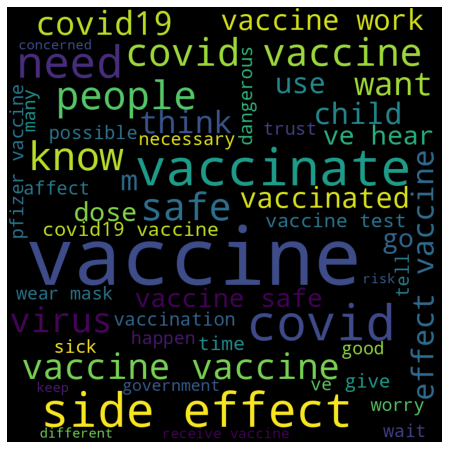

In [ ]:
# Create a string of all the labels
labels = ' '.join(df['lem_sentence'].astype(str))

# Create a word cloud of the label frequencies
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=50).generate(labels)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From this word cloud, in sentence column, the words in biggest font is "vaccine". After that, the most frequent word seems to be "covid", "side effect", "safe", "virus", "vaccinate" etc. 

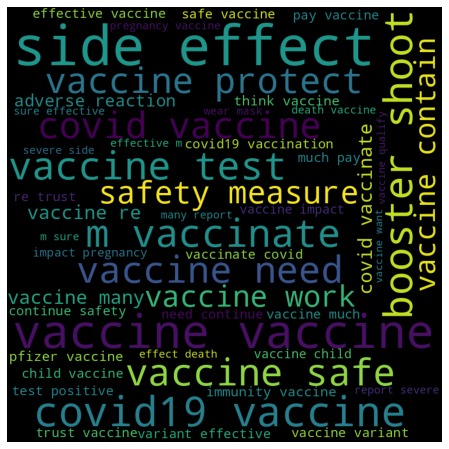

In [ ]:
# Create a string of all the labels
labels = ' '.join(df['lem_label'].astype(str))

# Create a word cloud of the label frequencies
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=50).generate(labels)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From this word cloud, in label column, the words in bigger fonts is "vaccine". "covid19", "side effect", "booster", "shoot", "vaccinate" etc.

## **iii. N-gram analysis**

### **Bigram Analysis**

In [ ]:
from collections import Counter

def get_bigrams(data_column):
    # Split the text into words
    words = data_column.str.split()

    # Initialize a counter for bigram frequencies
    bigram_counts = Counter()

    # Loop through each sentence and count bigrams
    for sentence in words:
        bigrams = zip(sentence, sentence[1:])
        bigram_counts.update(bigrams)

    # Return the top 10 bigrams and their frequency count
    top_bigrams = bigram_counts.most_common(10)

    return top_bigrams



In [ ]:
top_bigrams = get_bigrams(df['lem_sentence'])
print(top_bigrams)


[(('side', 'effect'), 426), (('covid', 'vaccine'), 226), (('get', 'vaccine'), 158), (('vaccine', 'work'), 142), (('effect', 'vaccine'), 136), (('ve', 'hear'), 129), (('vaccine', 'test'), 98), (('pfizer', 'vaccine'), 97), (('vaccine', 'safe'), 95), (('need', 'vaccine'), 94)]


the bigram analysis shows the top 10 most frequent pairs of words (bigrams) in the text, along with the frequency of their occurrence. Based on the results provided, the following interpretations can be drawn:
1. The most common bigram is "side effect" (occurring 426 times), indicating that concerns about vaccine side effects are a prevalent topic in the text.

2. "Covid vaccine" is the second most frequent bigram, occurring 226 times, suggesting that the main focus of the text is on Covid-19 vaccination.
3. "Get vaccine" is the third most frequent bigram, with a count of 158, indicating that the text likely discusses the importance of getting vaccinated.
4. "Vaccine work" (occurring 142 times) suggests that the efficacy of vaccines is also an important topic in the text.
5. "Effect vaccine" (occurring 136 times) is another bigram that indicates concerns about the potential side effects of vaccines.
6. "Ve hear" (occurring 129 times) is an interesting bigram that does not provide a clear interpretation. Without further context, it is difficult to determine what this bigram represents.
7. "Vaccine test" (occurring 98 times) may indicate that the text discusses the testing and development of vaccines.
8. "Pfizer vaccine" (occurring 97 times) suggests that the text may specifically focus on the Pfizer Covid-19 vaccine.
9. The bigram ('vaccine', 'safe') has a count of 95, which suggests that people are concerned about the safety of the COVID-19 vaccine.
10. The bigram ('need', 'vaccine') has a count of 94, which suggests that people believe that getting the COVID-19 vaccine is necessary.

### **Trigram Analysis**

In [ ]:
# trigram
from collections import Counter

def get_trigrams(data_column):
    # Split the text into words
    words = data_column.str.split()

    # Initialize a counter for trigram frequencies
    trigram_counts = Counter()

    # Loop through each sentence and count trigrams
    for sentence in words:
        trigrams = zip(sentence, sentence[1:], sentence[2:])
        trigram_counts.update(trigrams)

    # Return the top 10 trigrams and their frequency count
    top_trigrams = trigram_counts.most_common(10)

    return top_trigrams


In [ ]:
top_trigrams = get_trigrams(df['lem_sentence'])
print(top_trigrams)

[(('side', 'effect', 'vaccine'), 91), (('ve', 'hear', 'vaccine'), 49), (('vaccine', 'side', 'effect'), 36), (('long', 'term', 'effect'), 29), (('viral', 'vector', 'vaccine'), 28), (('bad', 'side', 'effect'), 26), (('vaccine', 'help', 'new'), 26), (('vaccine', 'work', 'new'), 26), (('need', 'wear', 'mask'), 25), (('allergic', 'reaction', 'vaccine'), 22)]


We can interpret a few things from this trigram analysis:

1. The most frequent trigram is ('side', 'effect', 'vaccine') with a count of 91, which reinforces the idea that people are concerned about the potential side effects of the COVID-19 vaccine.
2. The trigram ('ve', 'hear', 'vaccine') has a count of 49, which suggests that people are actively seeking information about the COVID-19 vaccine.
3. The trigram ('vaccine', 'side', 'effect') has a count of 36, which is similar to the most frequent bigram ('side', 'effect') and reinforces the idea that people are concerned about the potential side effects of the COVID-19 vaccine.
4. The trigram ('long', 'term', 'effect') has a count of 29, which suggests that people are interested in understanding the potential long-term effects of the COVID-19 vaccine.
5. The trigram ('viral', 'vector', 'vaccine') has a count of 28, which suggests that people are interested in understanding the different types of COVID-19 vaccines available.
6. The trigram ('bad', 'side', 'effect') has a count of 26, which reinforces the idea that people are concerned about the potential side effects of the COVID-19 vaccine.
7. The trigrams ('vaccine', 'help', 'new') and ('vaccine', 'work', 'new') both have a count of 26, which suggests that people are interested in understanding how the COVID-19 vaccine can help prevent the spread of the virus.
8. The trigram ('vaccine', 'work', 'new') has a count of 26, which suggests that people are interested in how the COVID-19 vaccine works and the new technologies behind it.
9. The trigram ('need', 'wear', 'mask') has a count of 25, which suggests that people are discussing the ongoing need for preventative measures like mask-wearing even after receiving the COVID-19 vaccine.
10. The trigram ('allergic', 'reaction', 'vaccine') has a count of 22, which suggests that people are concerned about the potential for allergic reactions to the COVID-19 vaccine.

## **iv. Topic Modelling**

In [ ]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

# Define a function to show topics
def show_topic(df, num_topics):
    # Tokenize the lemmatized sentences into words
    texts = [word_tokenize(document) for document in df]

    # Create a dictionary from the preprocessed texts
    dictionary = corpora.Dictionary(texts)

    # Create a bag-of-words representation of the texts
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Perform LDA topic modeling on the corpus
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                passes=10,
                                                random_state=317)

    # Print the topics and their associated words
    print(lda_model.print_topics())




In [ ]:
show_topic(df['lem_sentence'], 5)

[(0, '0.133*"vaccine" + 0.052*"virus" + 0.030*"test" + 0.029*"covid" + 0.027*"new" + 0.023*"work" + 0.023*"variant" + 0.023*"long" + 0.022*"effective" + 0.017*"vaccination"'), (1, '0.133*"vaccine" + 0.074*"people" + 0.026*"many" + 0.020*"covid" + 0.018*"wait" + 0.017*"want" + 0.016*"affect" + 0.016*"reaction" + 0.016*"see" + 0.015*"get"'), (2, '0.094*"vaccine" + 0.084*"effect" + 0.055*"side" + 0.042*"safe" + 0.026*"m" + 0.026*"go" + 0.023*"covid" + 0.023*"booster" + 0.021*"bad" + 0.021*"shoot"'), (3, '0.122*"vaccine" + 0.048*"vaccinate" + 0.043*"covid" + 0.033*"covid19" + 0.031*"get" + 0.026*"need" + 0.019*"make" + 0.016*"know" + 0.015*"protect" + 0.015*"sick"'), (4, '0.163*"vaccine" + 0.036*"ve" + 0.033*"pfizer" + 0.032*"hear" + 0.020*"government" + 0.019*"trust" + 0.016*"receive" + 0.016*"wear" + 0.013*"mask" + 0.013*"true"')]


### **Insights from this output:**

### <u>**First topic:**</u>
The top keywords are "vaccine," "virus," "test," "covid," "new," "work," "variant," "long," "effective," and "vaccination." 
1. The most dominant keyword in this topic is "vaccine", which has the highest probability of occurring in this topic. This indicates that the topic is likely focused on discussions related to vaccines, their development, effectiveness, and distribution.
2. The presence of "virus," "test," and "variant" suggests that there is a focus on monitoring the spread and evolution of the virus.
3. The term "effective" suggests that there is also discussion around the efficacy of various interventions, including vaccines and treatments, in combatting the virus.


### <u>**Second topic:**</u>
It looks like the top words that are associated with this topic are "vaccine," "people," "many," "COVID," "wait," "want," "affect," "reaction," "see," and "get."
1. The presence of words like "wait," "affect," and "reaction" suggest that this topic may be related to people's concerns and uncertainties around the COVID-19 vaccine. The high frequency of the word "vaccine" also supports this interpretation. It's possible that this topic is capturing conversations around people who are hesitant to get vaccenated, either because they're worried about side effects or because they don't trust the vaccine.
2. The words "people," "want," and "get" also support this interpretation, as they suggest that there is a desire among some individuals to receive the vaccine.


### <u>**Third topic:**</u>
1. Some of the most prominent words in this topic are "vaccine," "effect," and "side." This suggests that people are likely discussing the effectiveness of vaccines, as well as any potential negative side effects they may have.
2. The word "safe" also appears, which suggests that people may be concerned about the safety of vaccines. This is a common concern, especially given the speed at which COVID-19 vaccines were developed and approved.
3. Other words, such as "COVID," "booster," and "shoot," suggest that the discussion may be specifically related to COVID-19 vaccines and the need for booster shots.
4. The word "bad" also appears, which could be an indication that some people are expressing negative opinions or experiences related to vaccines.

### <u>**Fourth topic:**</u>
It appears that the top keywords that are most associated with this particular topic are "vaccine", "vaccinate", "COVID", "COVID19", "get", "need", "make", "know", "protect", and "sick".
1. The top two words in the result are "vaccine" and "vaccinate", indicating that this topic is highly focused on the importance of vaccination. It suggests that people are discussing the necessity and beneftts of getting vaccinated against COVID-19.
2. COVID-19 Pandemic: The words "covid" and "covid19" appear in the top four words, indicating that the discussions are related to the ongoing pandemic. This topic is highly relevant and important given the current global situation.
3. The keywords "protect" and "sick" could indicate that the topic is related to the benefits of vaccination, such as protecting oneself from illness.
4. The presence of words such as "get", "need", "make", "know", "protect", and "sick" also suggests that the discussions are likely focused on the practical aspects of vaccination, such as why people need to get vaccinated, how to make vaccines more accessible, and how vaccines can protect individuals from getting sick.

### <u>**Fifth topic:**</u>
1. It indicates that the most dominant topic in the corpus is related to "vaccine". The weight of this topic is 0.163, which means that about 16.3% of the content in the corpus is related to this topic.
2. The most common words associated with this topic are "vaccine", "Pfizer", "hear", "government", "trust", "receive", "wear", "mask", and "true". This suggests that the content of the corpus is likely discussing issues related to the COVID-19 vaccine, including the efficacy and safety of vaccines produced by Pfizer, the government's role in vaccine distribution and communication, and public trust in vaccines.
3. The keywords "receive," "wear," and "mask" may also suggest that people are discussing the actions they are taking to protect themselves from COVID-19, such as receiving the vaccine, wearing masks, and following government guidelines.



The topic modeling analysis of the corpus indicates that it primarily revolves around discussions related to the COVID-19 pandemic, with a specific focus on the topic of vaccines. The analysis reveals that there are several subtopics within the corpus, which include the efficacy, safety, and distribution of vaccines, as well as public trust and concerns around the COVID-19 vaccine. Additionally, the analysis suggests that there are discussions around the practical aspects of vaccination, such as why people need to get vaccinated, how to make vaccines more accessible, and how vaccines can protect individuals from getting sick. The presence of words related to protective measures, such as wearing masks, also suggests that people are discussing actions they can take to safeguard themselves from COVID-19. These findings provide valuable insights into the prevalent topics of discussion surrounding the COVID-19 pandemic and highlight the need for continued research and understanding of these important issues.

## **v. Sentiment Analysis**

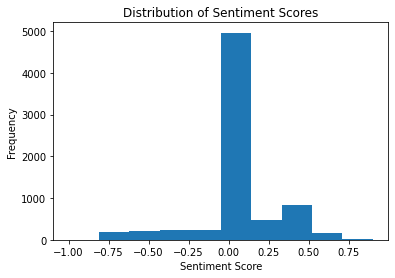

In [ ]:
from textblob import TextBlob

# create a new column 'sentiment' with the polarity of each sentence
df['sentiment'] = df['lem_sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)

'''
 'sentiment' in the dataframe 'df' contains the polarity score of each sentence in the 'lem_sentence' column.
'''

# visualize the distribution of sentiment scores using a histogram
import matplotlib.pyplot as plt

plt.hist(df['sentiment'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

TextBlob is used to calculate the polarity score of each sentence in the text corpus. The polarity score indicates whether a sentence expresses a positive, negative, or neutral sentiment. The resulting polarity scores are then visualized using a histogram to show the distribution of sentiment scores in the text corpus.

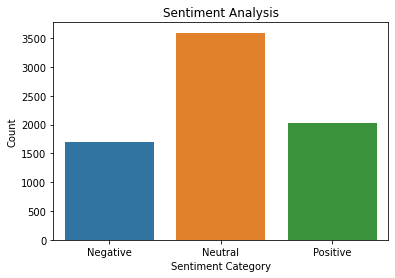

In [ ]:
# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply the analyzer to the 'lem_sentence' column and get the compound score for each sentence
df['sentiment_score'] = df['lem_sentence'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Define a function to map the compound score to a sentiment category
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the sentiment score column to get the sentiment category for each sentence
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: get_sentiment(x))

# Visualize the distribution of sentiment categories
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


In [ ]:
# Define a function to get the sentiment score of each sentence
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Add a new column for the sentiment score
df['sentiment_score'] = df['lem_sentence'].apply(get_sentiment_score)

'''
'sentiment_score' in 'df' contains the compound score of each sentence in the 'lem_sentence' column.
'''

df.head(5)

,sentence,label,label_idx,token_sentence,token_label,lem_sentence,lem_label,sentiment,sentiment_score,sentiment_category
0,booster shots side effects worsen second shot,booster shot side effects worse second shot,175,"[booster, shots, side, effects, worsen, second...","[booster, shot, side, effects, worse, second, ...",booster shot side effect worsen second shot,booster shoot side effect bad second shot,0.00,-0.5106,Negative
1,vaccine side effects,booster shot side effects worse second shot,175,"[vaccine, side, effects]","[booster, shot, side, effects, worse, second, ...",vaccine side effect,booster shoot side effect bad second shot,0.00,0.0000,Neutral
2,booster vaccine leaves worse side effects firs...,booster shot side effects worse second shot,175,"[booster, vaccine, leaves, worse, side, effect...","[booster, shot, side, effects, worse, second, ...",vaccine leave bad side effect first second dose,booster shoot side effect bad second shot,-0.15,-0.5719,Negative
3,reinforcements safe,booster shot side effects worse second shot,175,"[reinforcements, safe]","[booster, shot, side, effects, worse, second, ...",reinforcement safe,booster shoot side effect bad second shot,0.50,0.4404,Positive
4,second dose covid19 vaccine higher side effects,booster shot side effects worse second shot,175,"[second, dose, covid19, vaccine, higher, side,...","[booster, shot, side, effects, worse, second, ...",second covid19 vaccine high side effect,booster shoot side effect bad second shot,0.08,0.0000,Neutral


VADER sentiment analyzer is used to calculate a compound score for each sentence in the text corpus. The compound score is a metric that combines the positive, negative, and neutral scores produced by VADER into a single score that represents the overall sentiment of the sentence. The compound scores are then mapped to sentiment categories (positive, negative, or neutral) using a custom function.

In [ ]:
# Count the number of rows containing 'positive' sentiment
positive_count = df[df['sentiment_category'] == 'Positive'].shape[0]

# Count the number of rows containing 'negative' sentiment
negative_count = df[df['sentiment_category'] == 'Negative'].shape[0]

# Count the number of rows containing 'neutral' sentiment
neutral_count = df[df['sentiment_category'] == 'Neutral'].shape[0]

print(f"Positive sentiment count: {positive_count}")
print(f"Negative sentiment count: {negative_count}")
print(f"Neutral sentiment count: {neutral_count}")

Positive sentiment count: 2036
Negative sentiment count: 1701
Neutral sentiment count: 3596


The resulting sentiment categories are then visualized using a countplot to show the distribution of sentiment categories in the text corpus. Finally, the analysis counts the number of sentences in the text corpus that belong to each sentiment category.

In [ ]:
# Print the top 10 positive sentiments
print("Top 10 positive sentiments:")
print(df.sort_values('sentiment_score', ascending=False)[['lem_sentence', 'sentiment_score']].head(10))

Top 10 positive sentiments:
                                           lem_sentence  sentiment_score
2448  company profit whole pandemic trust vaccine sa...           0.9485
7041  vaccination effective public health interventi...           0.9460
7328  stay healthy free covid use safety measure soc...           0.9001
2653    concern normal good trust efficacy vaccine hope           0.8442
6712  stay safe jab easy work shop take social dista...           0.8402
2245                 trust government much hope sincere           0.8360
6403  trust pfizer vaccine hear develop think s safe...           0.8176
3976           vaccine safe effective recommend vaccine           0.8176
29             regular safety measure stay healthy good           0.8126
128                           side effect great benefit           0.7964


### **Insights from this output:**
1. The top 10 positive sentiments all contain words that suggest optimism and positivity towards the COVID-19 vaccine. Words like "trust," "safe," "effective," and "recommend" appear frequently, indicating that people are expressing confidence in the vaccine's ability to protect them from the virus.
2. Some sentiments also mention the importance of taking safety measures, such as social distancing and regular health check-ups, which suggests that people are aware of the ongoing risk of the pandemic and are taking steps to protect themselves.
3. The sentiment scores for the top 10 positive sentiments are all quite high, ranging from 0.7964 to 0.9485. This indicates that these sentiments are very positive in nature and are likely reflecting strong opinions or beliefs about the COVID-19 vaccine.
4. The top positive sentiments suggest that people are feeling optimistic about the vaccine's potential to combat the pandemic and are expressing trust in its efficacy and safety. These sentiments are likely driven by the widespread distribution of the vaccine and the positive results seen in countries where vaccination rates are high.

In [ ]:
# Print the top 10 negative sentiments
print("\nTop 10 negative sentiments:")
print(df.sort_values('sentiment_score', ascending=True)[['lem_sentence', 'sentiment_score']].head(10))


Top 10 negative sentiments:
                                           lem_sentence  sentiment_score
6094      die continue die serious case people die hour          -0.9186
3585  many people die virus vaccine need bad effect ...          -0.9062
5779  chance receive covid vaccine sick common flu r...          -0.8979
4695  slow vaccination rate people fear death medium...          -0.8834
7293  covid combination new disease political econom...          -0.8807
5642  report people suffer severe vaccine side effec...          -0.8750
6492  ve hear people suffer allergic reaction get va...          -0.8689
579               ve hear pain killer stop vaccine work          -0.8689
6331                  vaccine worry sick give bad covid          -0.8658
4070             vaccine stop get infected stop get ill          -0.8555


### **Insights from this output:**
1. Several of the negative sentiments express fear of illness, death, or severe side effects related to the vaccine. For example, sentiment 6094 expresses the fear of people dying from the virus, while sentiment 3585 expresses concern about the potential negative effects of the vaccine on people's health.

2. Sentiment 4695 suggests that the slow rate of vaccine rollout is causing concern and fear among people. This could be related to concerns about the continued spread of the virus and the impact it is having on people's lives.

3. Sentiment 7293 suggests that political and economic factors are also contributing to negative attitudes towards the COVID-19 vaccine. This could be related to issues such as vaccine distribution, government policies, or the economic impact of the pandemic.

4. Several of the negative sentiments express concerns about vaccine side effects. For example, sentiment 5642 suggests that people are worried about severe side effects related to the vaccine, while sentiment 6492 expresses concern about allergic reactions.

5. Sentiment 579 expresses doubt about the effectiveness of the vaccine, specifically in relation to painkillers. This suggests that some people may be skeptical about the benefits of getting vaccinated.

### Similary, for lem_label:

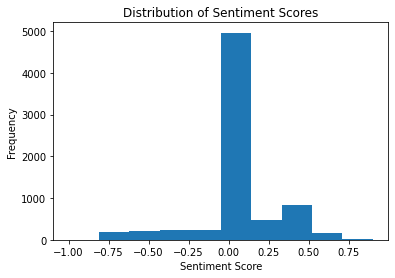

In [ ]:
from textblob import TextBlob

# create a new column 'sentiment' with the polarity of each sentence
df['label_sentiment'] = df['lem_label'].apply(lambda x: TextBlob(x).sentiment.polarity)

# visualize the distribution of sentiment scores using a histogram
import matplotlib.pyplot as plt

plt.hist(df['sentiment'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


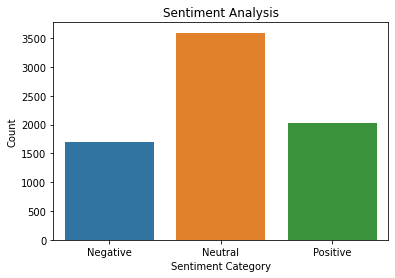

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply the analyzer to the 'lem_sentence' column and get the compound score for each sentence
df['label_sentiment_score'] = df['lem_label'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Define a function to map the compound score to a sentiment category
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the sentiment score column to get the sentiment category for each sentence
df['label_sentiment_category'] = df['label_sentiment_score'].apply(lambda x: get_sentiment(x))

# Visualize the distribution of sentiment categories
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


In [ ]:
# Define a function to get the sentiment score of each sentence
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Add a new column for the sentiment score
df['label_sentiment_score'] = df['lem_label'].apply(get_sentiment_score)

df.head(3)

,sentence,label,label_idx,token_sentence,token_label,lem_sentence,lem_label,sentiment,sentiment_score,sentiment_category,label_sentiment,label_sentiment_score,label_sentiment_category
0,booster shots side effects worsen second shot,booster shot side effects worse second shot,175,"[booster, shots, side, effects, worsen, second...","[booster, shot, side, effects, worse, second, ...",booster shot side effect worsen second shot,booster shoot side effect bad second shot,0.00,-0.5106,Negative,-0.35,-0.7096,Negative
1,vaccine side effects,booster shot side effects worse second shot,175,"[vaccine, side, effects]","[booster, shot, side, effects, worse, second, ...",vaccine side effect,booster shoot side effect bad second shot,0.00,0.0000,Neutral,-0.35,-0.7096,Negative
2,booster vaccine leaves worse side effects firs...,booster shot side effects worse second shot,175,"[booster, vaccine, leaves, worse, side, effect...","[booster, shot, side, effects, worse, second, ...",vaccine leave bad side effect first second dose,booster shoot side effect bad second shot,-0.15,-0.5719,Negative,-0.35,-0.7096,Negative


In [ ]:
# Count the number of rows containing 'positive' sentiment
positive_count = df[df['sentiment_category'] == 'Positive'].shape[0]

# Count the number of rows containing 'negative' sentiment
negative_count = df[df['sentiment_category'] == 'Negative'].shape[0]

# Count the number of rows containing 'neutral' sentiment
neutral_count = df[df['sentiment_category'] == 'Neutral'].shape[0]

print(f"Positive sentiment count: {positive_count}")
print(f"Negative sentiment count: {negative_count}")
print(f"Neutral sentiment count: {neutral_count}")

Positive sentiment count: 2036
Negative sentiment count: 1701
Neutral sentiment count: 3596


Based on the sentiment analysis graph for both of the columns, it appears that the text corpus contains more sentences with a neutral sentiment (3,596) than those with either a positive (2,036) or negative (1,701) sentiment. The reult suggests that the text may be fairly balanced or objective in nature, rather than expressing strong positive or negative emotions.


One possible insight from the sentiment analysis is that there is a lot of discussion about the COVID-19 vaccine, which is likely contributing to the positive sentiments. People may be expressing optimism about the vaccine's effectiveness and the potential for it to bring an end to the pandemic.


At the same time, the presence of negative and neutral sentiments suggests that there are still concerns and uncertainties around the vaccine as well. These could include concerns about side effects or efficacy, as well as more general concerns about the ongoing impact of the pandemic on people's lives.


The smaller number of negative sentiments could indicate that concerns and fears about the vaccine are not as widespread as might be expected, or that people are expressing their concerns in more nuanced or neutral ways.


Overall, the sentiment analysis provides some context for the topic modeling results, suggesting that there is a complex mix of emotions and opinions around the COVID-19 vaccine and related issues, with a general tendency towards positivity but still significant concerns and uncertainties as well. This insight can be useful for healthcare professionals, public health officials, and policy makers in designing effective communication and outreach strategies to increase vaccination rates and address any remaining concerns or misconceptions.

In [ ]:
# Print the top 10 positive sentiments
print("Top 10 positive sentiments:")
print(df.sort_values('sentiment_score', ascending=False)[['lem_label', 'sentiment_score']].head(10))

Top 10 positive sentiments:
                                lem_label  sentiment_score
2448        trust company produce vaccine           0.9485
7041                    vaccine mandatory           0.9460
7328  regular safety measure stay healthy           0.9001
2653             m concerned vaccine sick           0.8442
6712                stay safe m vaccinate           0.8402
2245                sure trust government           0.8360
6403                  choose vaccine want           0.8176
3976                 tell covid19 vaccine           0.8176
29    regular safety measure stay healthy           0.8126
128             covid vaccine bad disease           0.7964


### **Insights from this output:**
1. The top positive sentiment is about trust in the company producing the vaccine, indicating that people feel positively about the vaccine's efficacy and safety.

2. Another positive sentiment is about vaccine mandates, suggesting that people feel positively about policies that require vaccination.

3. People also seem to feel positively about the idea of following regular safety measures to stay healthy, which could include wearing masks, social distancing, and practicing good hygiene.

4. Some positive sentiments express people's intention to get vaccinated, indicating a desire to protect themselves from COVID-19.

5. The sentiment "sure trust government" suggests that some people feel positively about their government's handling of the vaccine distribution and communication.

In [ ]:
# Print the top 10 negative sentiments
print("\nTop 5 negative sentiments:")
print(df.sort_values('sentiment_score', ascending=True)[['lem_label', 'sentiment_score']].head(5))


Top 5 negative sentiments:
                                         lem_label  sentiment_score
6094  many report severe side effect death vaccine          -0.9186
3585                        mortality rate vaccine          -0.9062
5779               need covid vaccine immunize flu          -0.8979
4695                 covid19 vaccination rate slow          -0.8834
7293                                 dangerous say          -0.8807


### **Insights from this output:**
1. The sentiment analysis shows that the top five negative sentiments in the corpus are related to side effects and mortality rates associated with the COVID-19 vaccine, the slow vaccination rate, and the need to get vaccinated against COVID-19 to protect against the flu.
2. These negative sentiments suggest that people may be expressing concerns about the safety and efficacy of the COVID-19 vaccine. The mention of severe side effects and death is particularly concerning, as it may reflect fears about adverse reactions to the vaccine. The mention of mortality rates may also suggest that people are concerned about the overall impact of the pandemic on public health.
3. The slow vaccination rate could reflect frustration with the pace of vaccine distribution, and a sense that more needs to be done to get people vaccinated quickly. The need to get vaccinated against COVID-19 to protect against the flu may indicate a lack of awareness or understanding about the differences between these two viruses and the vaccines that are available to protect against them.


## **vi. Concordance Analysis**
\
Concordance is a useful tool for exploring patterns and relationships within a text corpus. In the context of the COVID-19 vaccine dataset, concordance can help identify frequently occurring words or phrases and provide insight into people's concerns and questions regarding the vaccine.

In [ ]:
from nltk.text import Text

# Create a list of lemmatized sentences
lem_sentences = df['lem_sentence'].tolist()

# Create a Text object
text = Text([word for sent in lem_sentences for word in sent.split()])

In [ ]:
# Perform concordance analysis for a word
text.concordance('vaccine')

Displaying 25 of 4353 matches:
shot side effect worsen second shot vaccine side effect vaccine leave bad side 
sen second shot vaccine side effect vaccine leave bad side effect first second 
e reinforcement safe second covid19 vaccine high side effect side effect bad fi
nd injection few effect side effect vaccine vaccine cause side effect people si
tion few effect side effect vaccine vaccine cause side effect people side effec
ct bad second shot risk get booster vaccine reinforcement soft dose covid high 
ver second shot booster go feel bad vaccine bad first second dose leave strong 
econd dose leave strong side effect vaccine bad side effect stay careful standa
vid enough follow hygiene rule need vaccine regular safety measure keep healthy
nt spread covid wear mask stay home vaccine know vaccine recommend child many v
id wear mask stay home vaccine know vaccine recommend child many vaccination gi
ion give child child die administer vaccine vaccine safe young child vaccine sa
 child ch

By analyzing the concordance output, one can gain insight into the main themes or topics related to a specific word, such as "vaccine." For instance, upon searching for this word, the output would reveal mentions of vaccine ***side effects, vaccine safety, vaccine administration, vaccine doses, and vaccine recommendations***. This can help in identifying and understanding the key topics or themes surrounding the concept of vaccines in the given text.

In [ ]:
# Perform concordance analysis for a word
text.concordance('covid')

Displaying 25 of 873 matches:
ster vaccine reinforcement soft dose covid high fever second shot booster go fe
ety measure stay healthy stop spread covid practice social distancing wear mask
id19 safety measure sufficient avoid covid enough follow hygiene rule need vacc
deline keep safe wash hand keep safe covid regular measure keep safe action kee
ng measure sufficient prevent spread covid wear mask stay home vaccine know vac
e safe young child other side effect covid vaccine bring child specific vaccine
er child differ safety child vaccine covid give baby safe vaccine suited child 
radict vaccine medication avoid take covid safe people medical condition medica
diction vaccine contraindication get covid vaccine woman affect vaccine man sex
ffect bad disease vaccine sicker get covid doubt vaccine bad virus medicine cur
ine bad covid19 situation worsen bad covid think take vaccine dangerous disease
 disease wan safe side effect affect covid vaccine cold kill side effect bad co
id vaccine

Upon analyzing the concordance output, it can be observed that the text includes mentions of ***vaccine doses, vaccine side effects, vaccine safety, vaccine contraindication, vaccine recommendations, and COVID-19's danger***. The mentions of vaccine doses and vaccine administration suggest that people may be discussing their vaccination experiences, while the mentions of vaccine safety and vaccine contraindication indicate people's concerns regarding vaccine safety. Furthermore, the mentions of COVID-19's danger suggest that people are aware of the severity of the disease. This concordance analysis can provide an idea of the topics related to vaccines and COVID-19 that are being discussed by people.

# **6. Modelling, Evaluation and Deployment**
As the current analysis pertains solely to data analysis, it does not include sections on modelling, evaluation, or deployment.

# **7. Conclution**

This report aimed to explore, analyze, manipulate, visualize, and interpret the VIRA Conversation Corpus using Python and following the CRISP-DM method. The objective was to derive insights from the datasets and craft a clear, engaging, and informative narrative, with a specific focus on identifying common user intents in conversing about COVID-19 vaccines and detecting levels of user trust in the VIRA chatbot. The insights derived from the analysis provided valuable information for health organizations, policymakers, and stakeholders to address vaccine hesitancy and strategies to promote vaccine acceptance.

Regarding our business questions, we found that the most frequent words and the topic modeling analysis of the corpus indicated that discussions primarily revolve around the COVID-19 pandemic, with a specific focus on vaccines. The subtopics include the efficacy, safety, and distribution of vaccines, public trust and concerns around the COVID-19 vaccine, as well as practical aspects of vaccination, such as making vaccines more accessible and protecting individuals from getting sick. However, we also found that the top 10 positive sentiments suggest that people are feeling optimistic about the vaccine's potential to combat the pandemic and are expressing trust in its efficacy and safety.

The sentiment analysis revealed that the majority of the sentiments expressed about the COVID-19 vaccine were positive or neutral. People expressed optimism and positivity towards the vaccine and expressed confidence in its ability to protect them from the virus. The sentiments were likely driven by the widespread distribution of the vaccine and the positive results seen in countries with high vaccination rates.

The stakeholders of the Intent dataset include healthcare professionals, public health officials, researchers, policymakers, and vaccine manufacturers, who can use the insights from this analysis to gain a better understanding of the public's concerns, questions, and intentions related to COVID-19 vaccines. The findings of this report provide valuable insights that can help stakeholders design effective strategies for addressing these concerns and providing accurate information to the public, ultimately leading to higher rates of vaccination and the end of the pandemic.

Overall, this report provides a comprehensive analysis of the VIRA Conversation Corpus and provides valuable insights into the most common user intents related to COVID-19 vaccines and the sentiment towards them. The findings can inform ongoing research, public health policies, and vaccine development efforts, ultimately contributing to the global effort to combat the COVID-19 pandemic.

# **Reference:**

1. Gretz, S., Toledo, A., Friedman, R., Lahav, D., Weeks, R., Bar-Zeev, N., Sedoc, J., Sangha, P., Katz, Y., & Slonim, N. (2022). Benchmark Data and Evaluation Framework for Intent Discovery Around COVID-19 Vaccine Hesitancy. https://doi.org/10.48550/arxiv.2205.11966
2. Stack Overflow. (2019). Why are Google Colab shell commands not working? Retrieved March 29, 2023, from https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
3. Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2021). CRISP-DM 2.0: A comprehensive data mining methodology and process model. DataScience PM. Retrieved March 29, 2023, from https://www.datascience-pm.com/crisp-dm-2/

In [ ]:
%cd /content/gdrive/MyDrive/Colab/ANLP/AT1_PartB


/content/gdrive/MyDrive/Colab/ANLP/AT1_PartB


In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
